In [1]:
import glob
from Fast_MSS import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Labels as determined by the CamVid semantic segmentation benchmark dataset (Road Scenes)
labels = ['sky', 'building', 'column_pole', 
          'road', 'sidewalk', 'tree', 'sign', 
          'fence', 'car', 'pedestrian', 'bicyclist', 'void']

In [3]:
# 50 random images and corresponding labels from CamVid
images = glob.glob('CamVid\\images\\*.png')
ground_truths = glob.glob('CamVid\\labels\\*.png')

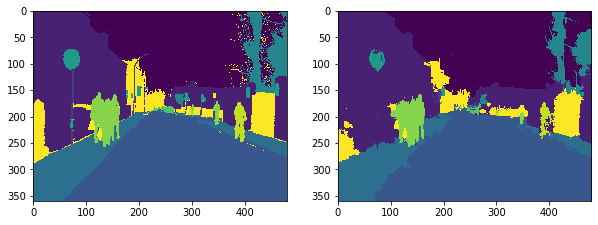

In [4]:
# Loops through all 50 samples
for _ in range(50):
    
    image = io.imread(images[_])
    ground_truth = io.imread(ground_truths[_])
    
    # Synthesize sparse labels from the ground-truth 
    sparse = synthesize_sparse_labels(ground_truth, labels, percent = .01, ratio = .75)
    
    # Create a mask using the synthesized sparse labels and fast_mss
    mask = fast_mss(image, sparse, labels, start_iter = 7500, end_iter = 80, num_iter = 20, method = 'mode')

    # Save the mask in a seperate folder for later
    io.imsave(arr = mask, fname = images[_].replace('images', 'predictions'))
    
    
# Show the last sample
display(ground_truth, mask)

In [6]:
# Get all of the masks made by fast_mss
predictions = glob.glob('CamVid\\predictions\\*.png')

# Compare the masks with the ground_truth
get_scores(ground_truths, predictions, labels)

Relative Abundance: 
   Class Labels  Ground-Truth  Predictions
0           sky        0.1642       0.1731
1      building        0.2526       0.2635
2   column_pole        0.0102       0.0052
3          road        0.3100       0.3131
4      sidewalk        0.0545       0.0507
5          tree        0.0828       0.0800
6          sign        0.0095       0.0059
7         fence        0.0102       0.0098
8           car        0.0590       0.0600
9    pedestrian        0.0071       0.0056
10    bicyclist        0.0029       0.0027
11         void        0.0371       0.0302

Confusion Matrix:
[[0.99 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.97 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.01]
 [0.09 0.38 0.27 0.01 0.03 0.1  0.02 0.01 0.01 0.01 0.   0.06]
 [0.   0.   0.   0.98 0.01 0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.03 0.   0.09 0.85 0.   0.   0.   0.   0.   0.   0.01]
 [0.06 0.03 0.   0.   0.   0.89 0.   0.   0.   0.   0.   0.01]
 [0.01 0.36 0.02 0.   0